<a href="https://colab.research.google.com/github/Valejbk/AnalisisTiendasRMP/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:


!wget https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/main/prestacar.csv


--2025-08-17 03:08:36--  https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/main/prestacar.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/prestacar.csv [following]
--2025-08-17 03:08:36--  https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/prestacar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5767082 (5.5M) [text/plain]
Saving to: ‘prestacar.csv’

prestacar.csv       100%[============

In [2]:


!wget https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/main/Clasificacion_validacion_y_metricas.ipynb


--2025-08-17 03:08:37--  https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/main/Clasificacion_validacion_y_metricas.ipynb
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/Clasificacion_validacion_y_metricas.ipynb [following]
--2025-08-17 03:08:37--  https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/Clasificacion_validacion_y_metricas.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20216 (20

In [3]:
import pandas as pd


In [4]:
#para leer copiamos la ruta de acceso

datos = pd.read_csv('/content/prestacar.csv')


In [5]:
#visualizamos todo el conjunto de datos (54.025 filas y 11 columnas)

datos


,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [6]:
#Paso 2: segmentar el conjunto de datos de nuestra base para obtener los atributos explicativos de la variable respuesta
#puedes colocar mayúscula porq' se trata de 1 MATRIZ
#separamos en X todas las variables explicat. y en y queda sólo la columna "moroso"
#cargar con play

X = datos.drop(columns= 'moroso', axis= 1)
y = datos.moroso


In [7]:
#vamos a utilizar un modelo de clasificación
#creamos la variable "modelo" y lo dejamos como igual a clasificador de árbol y sin pasar ningún parámetro (vacío)
#ejecutamos modelo.fit sobre ambos (X, y)---> para entrenar el modelo a partir de las variables explicativas y la variable respuesta
#ejecutamos .score para ver el puntaje del modelo sobre X e y
#recordar por qué este modelo (sin pasar ningún parámetro da 100%)... OJOOO


from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)



1.0

In [8]:
#obviamente el resultado no es confiable y debemos trabajar aún más en la base de datos

print(f'La exactitud del modelo es: {modelo.score(X, y)}')


La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [9]:
#el objetivo es tener un subgrupo de VALIDACIÓN, en la parte entrenamiento, para probar el modelo
#vamos a imprtar de sklearn un paquete que nos facilita este trabajo
#el train_test_split hace la separación básica (entrenamiento/ prueba)
#necesitamos 1 paso más

from sklearn.model_selection import train_test_split


In [10]:
#X, X_test, y, y_test serán los de prueba
#tomamos una base de prueba con test_size del 15%
#usamos método stratify (de y) que deja la misma cantidad de observaciones para morosos en los 2 conjuntos de datos que estamos separando
#random_state se refiere al estado de aleatoriedad que permite replicar esta misma división en cualq'r momento (dividir de la misma manera)
#después, vamos a hacer lo mismo para la VALIDACIÓN
#sin test_size porq' cuando no se especifica equivale al 25%
#ejecutamos con play

X, X_test, y, y_test = train_test_split(X, y, test_size= 0.15, stratify= y, random_state= 5)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, random_state= 5)


In [11]:
#vamos a instanciar nuestro modelo (sin parámetros) ***NO es una buena práctica pero lo veremos bien después
#vamos a calcular la exactitud del modelo tanto para validación como para prueba
#resultado muestra que el modelo de árbol memorizó todas las salidas y en la validación sólo llegó al 84%
#por tanto, ésta no es la mejor forma de instanciar un modelo de árbol de decisión
# entonces debemos darle una profundidad al menos y lo vamos a hacer con max_depth=10


modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')


La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8462677467119589


In [12]:
#vemos por el resultado que está generalizando mejor (92% y 90%)

modelo = DecisionTreeClassifier(max_depth= 10)
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')


La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205574912891986
La exactitud del modelo con el conjunto de validación es de: 0.9061928403449176


In [13]:
#esta generalización nos da una idea pero no sabemos a qué se refiere el 92% y el 90%
#¿qué generalizó bien?, ¿cuántos morosos?, ¿cuántos clientes que cumplen?


### Evaluando el modelo

In [14]:
#primero importamos la matriz de confusión

from sklearn.metrics import confusion_matrix


In [15]:
#creamos 1 variable llamada y_previsto
#vamos a hacer una predicción con la X de validación (X_val)
#y_val es el valor real e y_previsto es el valor que vamos a predecir
#no sabemos qué representan los números, por lo tanto, vamos a importar otro recurso

y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(matriz_confusion)


[[10361   118]
 [  959    43]]


In [16]:
#ConfusionMatrixDisplay---> nos permite dibujar nuestra matriz de confusión

from sklearn.metrics import ConfusionMatrixDisplay


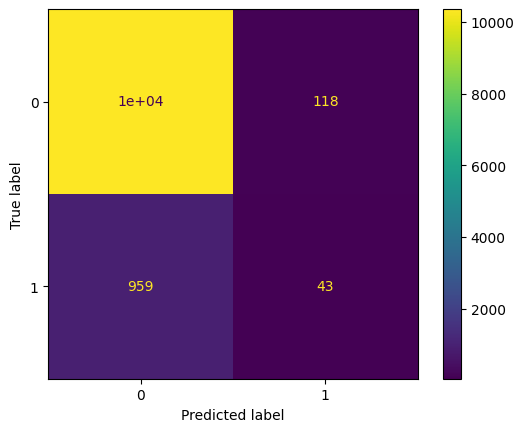

In [17]:
#agregamos 1 variable para visualizar la matriz_confusión que nos salió con puros números [[10356  123   958   44]]
#el ";" es para evitar tener que importar matplotlib (necesario para hacer un plt.show)
#en eje y están los valores reales: 0=el que cumple; 1=deudor
#en eje X están los valores previstos: 0=el que cumple; 1=deudor


visualizacion = ConfusionMatrixDisplay(matriz_confusion)

visualizacion.plot();


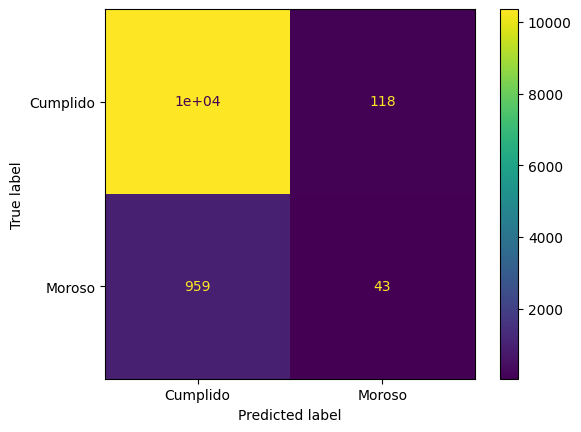

In [18]:
#aún está un poco difícil de leer---> agregaremos etiquetas
#confusion_matrix es igual a matriz de confusión
#display_labels (etiquetas) con una lista de Python con 2 elementos "Cumplido y Moroso"
#¿qué dice la matriz de confusión?: del modelo predijo cumplidos al momento de validar, más de 10.000 clientes correcta%
#                                  s/e, 960 dijo que eran cumplidos y son morosos
#en cuanto a los morosos dijo: 118 eran morosos cuando en realidad son cumplidos
#                              y sólo identificó a 42 morosos

visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels= ['Cumplido', 'Moroso'])

visualizacion.plot();


In [19]:


!wget https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/desafios/diabetes.csv


--2025-08-17 03:08:43--  https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/raw/refs/heads/desafios/diabetes.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/desafios/diabetes.csv [following]
--2025-08-17 03:08:43--  https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/desafios/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8960 (8.8K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[=======

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [20]:
#cuadrante 1: Verdadero Negativo = valor real 0 (cliente cumplido 0 y valor predicho 0) más de 10.000 clientes
#cuadrante 2: Falso Positivo = valor real 0 y valor predicho 1 (moroso), 123 clientes que pagan (cumplidos)---> ERROR TIPO 1
#cuadrante 3: Falso Negativo = valor real moroso y valor predicho 0 (cumplido), son 957 morosos---> ERROR TIPO 2
#cuadrante 4: Verdadero Positivo = valor real moroso, valor predicho moroso, 45 clientes


In [21]:
#para hacer los cálculos automática%, importamos de sklearn las métricas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [22]:
#primera fórmula---> Precisión TP/ TP + FP---> 26% de Precisión (muy deficiente)

45/ (45 + 123)


0.26785714285714285

In [23]:
#métricas que vamos a calcular...
#la métrica de validación que vamos a utilizar y vamos a mejorar es RECALL

print(f'La precisión del modelo es de: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (recall) del modelo es de: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val, y_previsto)}')


La precisión del modelo es de: 0.2670807453416149
La sensibilidad (recall) del modelo es de: 0.04291417165668663
La exactitud (accuracy) del modelo es de: 0.9061928403449176


In [24]:
#vamos a ver el F1-score sólo como referencia
#el resultado de 0.070 me indica que está más lejos de 1... o sea, el modelo está desempeñándose muy mal

print(f'El F1-score del modelo es de: {f1_score(y_val, y_previsto)}')


El F1-score del modelo es de: 0.07394668959587274


### Curva ROC

In [25]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [26]:
#es otro mecanismo de validac. de modelo
#ROC es característica operativa del receptor

from sklearn.metrics import RocCurveDisplay


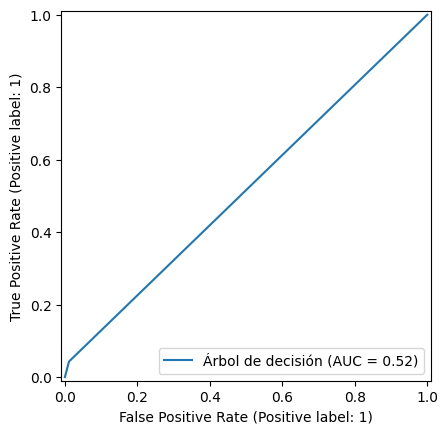

In [27]:
#vamos a graficar
#notamos que es un modelo deficiente ya que es casi línea recta (o sea, marca aleatoriedad 50/ 50), no sirve

RocCurveDisplay.from_predictions(y_val, y_previsto, name= 'Árbol de decisión');


In [28]:
 #ahora vamos a traer el puntaje del área bajo la curva (AUC)
 #cargamos con play

from sklearn.metrics import roc_auc_score


In [29]:
#ayuda a validar el modelo

print(f'El área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto)}')


El área bajo la curva ROC es: 0.5158267775928247


### Curva de  precisión x sensibilidad

In [30]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [31]:
#otra métrica de vakidación muy importante
#el predictor ideal es el que logra aislar bien y determinar de forma perfecta cada categoría
#cuando separamos bien cada 1 de estas clases el AUC llega casi a 1.0 y el modelo va a ser mejor
#traemos new% PrecisionRecallDisplay con "play"

from sklearn.metrics import PrecisionRecallDisplay



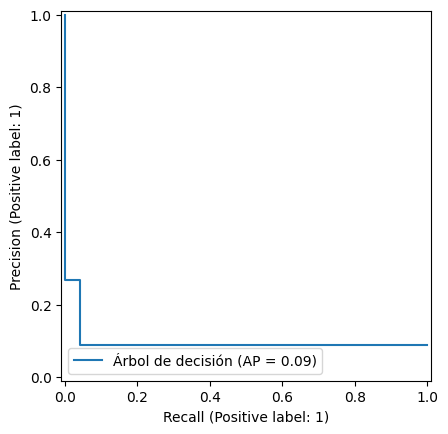

In [32]:
#es muy parecido a lo hecho anterior%
#aún es deficiente por que el resultado es 0.10 (muy lejos de 1)

PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name= 'Árbol de decisión');


In [33]:
#ahora llamamos otra métrica para probar
#cargamos con play

from sklearn.metrics import average_precision_score


In [34]:
#para tratar de validar el modelo pero da 0.09

print(f'El score promedio de precisión versus recall es: {average_precision_score(y_val, y_previsto)}')


El score promedio de precisión versus recall es: 0.09499085824540142


In [35]:
#OJOOO: ya vimos varias métricas importantes
# vimos precisión,
#       recall,
#       exactitud,
#       curva ROC,
#       área bajo la curva,
#       área bajo la curva de precisión y recall,
#       promedio de la curva



### Informe de métricas

In [36]:
#analizar todos los resultados desde un mismo lugar
#cargamos con play

from sklearn.metrics import classification_report


In [37]:
#instanciamos directamente
#classification_report recibe 2 variables: y_val es el valor real e y_previsto es el valor a predecir
#tenemos precision (precisión):
#        recall (sensibilidad):
#        f1-score (score F1):
#        support (cantidad muestras q' soportan estos valores):
#clase 0, pagan y clase 1, morosos---> se hace el cálculo basado en 11.481 observaciones
# 10.479 pagan bien (precision 0.92) y 1.002 son morosos (precision 0.26)
#el 0.04 de recall indica que el modelo es deficiente, no identifica bien a los morosos
#la exactitud (accuracy) a pesar de marcar 0.91 no necesaria% indica que mi modelo esté clasificando bien
#macro avg es el promedio general (en precision suma 0.92 y 0.26 y divide x 2), igual para recall y f1-score. Support es el total de la muestra
#weighted avg es el promedio ponderado (precisión veces soporte, dividido por el total de la muestra)
#profe: el desbalanceo (1002 morosos///10.479 cumplidos) determina promedios ponderados q' favorecen la clase más frecuente (cumplidos)

print(classification_report(y_val, y_previsto))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [38]:
#hemos evaluado y validado nuestros modelos de Machine Learning (Aprendizaje Automático) con diversas métricas.
#trabajamos con la exactitud, precisión, sensibilidad, la curva ROC, la curva de precisión y el área bajo la curva entre precisión y recall.
#Pero realizamos todas las validaciones con el mismo conjunto de datos de entrenamiento y validación, y en el mismo orden
#aleatoria%, se dividió 75% para entrenamiento y 25% para validación
#esta división puede tener 1 patrón específico y debido a este patrón, nuestro modelo generaliza con base en ese único patrón
#al ponerlo en producción, puede tener 1 desempeño mejor o peor porque aprendió con un único patrón de división
#Aquí es donde entra en juego la validación cruzada...




## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [39]:
#para hacer esta validac. cruzada nos apoyamos en KFold y validación cruzada
#cargamos con play

from sklearn.model_selection import KFold, cross_validate


In [40]:
#recreamos el modelo clasificador de árbol de decisión con profundidad maxDepth=10
#variable kf---> KFold recibe n_splits(cantidad de divisiones= 5)
#shuffle=True (para que se mezcle)
#random_state=5 (estado de aleatoriedad para reproducir la misma división de segmentos de datos para entrenamiento y validación)
#variable cv_resultados---> validación cruzada recibe el modelo (que es el estimador), recibe X, recibe y, más la validación cruzada (= a "kf")


modelo = DecisionTreeClassifier(max_depth= 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, X, y, cv= kf)
cv_resultados



{'fit_time': array([0.25880075, 0.23599887, 0.24826908, 0.24687839, 0.35617805]),
 'score_time': array([0.00452423, 0.00411987, 0.00486636, 0.00414896, 0.00558376]),
 'test_score': array([0.91322809, 0.90733885, 0.90766551, 0.91310976, 0.89917247])}

In [41]:
#vamos a separar los 5 resultados de 'test_score' que corresponde a cada una de las 5 validaciones

cv_resultados['test_score']


array([0.91322809, 0.90733885, 0.90766551, 0.91310976, 0.89917247])

In [42]:
#debemos calcular el promedio de los 5 valores y luego el desvío estándar
#con el desvío estándar se calcula el intervalo de confianza
#de la fórmula, la parte inferior es {promedio - 2 * desvio_std}
#en la parte superior, promedio + 2 veces la desviación estándar
#cuando el intervalo de confianza vaya a superar 1, no se puede. Entonces, tomamos el valor mínimo

promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()

print(f'El promedio de la exactitud es: {promedio}')
print(f'El desvío estándar de la validación cruzada es: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std, 1)}]')



El promedio de la exactitud es: 0.9081029349283695
El desvío estándar de la validación cruzada es: 0.005135440980497226
El intervalo de confianza es: [0.897832052967375, 0.9183738168893639]


### Validación cruzada con sensibilidad

In [43]:
#hicimos una validac. cruzada usando por defecto el porcentaje de exactitud
#s/e, la métrica que estamos usando es el recall (sensibilidad) que permite disminuir el error tipo 2
#crearemos una función llamada intervalo de confianza
#cargamos con play

def intervalo_confianza(resultados):
   promedio = resultados['test_score'].mean()
   desvio_std = resultados['test_score'].std()

   return f'El intervalo de confianza es: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std, 1)}]'


In [44]:
#en el parámetro scoring se informan las métricas a evaluar (aquí "recall")

modelo = DecisionTreeClassifier(max_depth= 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, X, y, cv= kf, scoring= 'recall')
cv_resultados


{'fit_time': array([0.2434144 , 0.24827695, 0.2487545 , 0.24180675, 0.24584579]),
 'score_time': array([0.00717282, 0.01031899, 0.00765848, 0.00649929, 0.0091846 ]),
 'test_score': array([0.02642008, 0.0210396 , 0.02091021, 0.01697128, 0.02427746])}

In [45]:
#el desvío estándar es bastante grande (0.015---> 0.028)

intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.015468163324533286, 0.028379288012863445]'

In [ ]:
#hasta el momento hemos usado diversas técnicas para validar el modelo
#aún no hemos mejorado el modelo
#OJOOOOOOOOOOOO


### Estratificando los datos

In [46]:
#si observamos la cantidad de morosos y cumplidos...

datos['moroso'].value_counts()


,count
moroso,
0,49309
1,4716


In [47]:
#usaremos otro método, un método estratificado de KFold
#cargamos con play

from sklearn.model_selection import StratifiedKFold


In [48]:
#los pasos son exactamente iguales
#sacamos cv_resultados y cargamos directamente con play (porq' vamos a usar intervalo_confianza)

modelo = DecisionTreeClassifier(max_depth= 10)
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 5) #que la proporción de cada clase se mantenga
cv_resultados = cross_validate(modelo, X, y, cv= skf, scoring= 'recall')



In [49]:
#observar que antes era de 0.015 a 0,028
#ahora es de 0.018 a 0.037, o sea, 1.8% a 3.7%---> el desvío típico aumentó (no se puede esperar más de este modelo)

intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.018018820645233392, 0.03785398174330213]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo